# Problem Statement:
The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

# Description of dataset:

Distance_to_solar_noon(inradians):The angular distance between the current time and solar noon,expressed in radians.
This reflects the sun's position relative to its higest point in the sky.

Temperature (in °C):The daily temperature,which is important for understanding how eat might effect solar panel.

Wind_direction (in degrees, 0-360):The daily average wind direction,indicating where the wind is coming from on a full compass scale.
    
Sky_cover (on a scale from 0 to 4):A qualitative measure of cloud cover, with 0 indicating a clear sky and 4 indicating full cloud coverage.
This impacts the amount of sunlight reaching the panels. 

Visibility (in kilometers): The distance at which objects can be clearly seen. Lower visibility could indicate fog or haze, which might reduce solar irradiance.

Humidity (in percentage): The daily average humidity, important for understanding moisture levels that can affect solar panel performance.

Average_wind_speed (in meters per second): The average wind speed during the 3-hour period when measurements were taken, providing finer temporal resolution of wind conditions.

Average_pressure (in mercury inches): The average barometric pressure during the 3-hour measurement period, which can correlate with weather conditions impacting solar irradiance.

Power_generated (in Joules, Target): The target variable representing the energy generated by the solar panels every 3 hours, measured in Joules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from scipy.stats import kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Arifkhd/assignment/main/solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


# Understand the Data

In [3]:
#Data Overview:

In [4]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

# Summarize the Data

In [8]:
#Descriptive Statistics
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


# Data Distribution:

In [9]:
#Central Tendency: Calculate mean, median, and mode using .mean(), .median(), and .mode().
df.mean()

distance-to-solar-noon            0.503294
temperature                      58.468493
wind-direction                   24.953425
wind-speed                       10.096986
sky-cover                         1.987671
visibility                        9.557705
humidity                         73.513699
average-wind-speed-(period)      10.129154
average-pressure-(period)        30.017760
power-generated                6979.846233
dtype: float64

In [10]:
df.median()

distance-to-solar-noon           0.478957
temperature                     59.000000
wind-direction                  27.000000
wind-speed                      10.000000
sky-cover                        2.000000
visibility                      10.000000
humidity                        77.000000
average-wind-speed-(period)      9.000000
average-pressure-(period)       30.000000
power-generated                404.000000
dtype: float64

In [11]:
#Dispersion: Analyze the spread of data using .var() for variance and .std() for standard deviation.
df.var()

distance-to-solar-noon         8.881803e-02
temperature                    4.680202e+01
wind-direction                 4.781969e+01
wind-speed                     2.340803e+01
sky-cover                      1.993681e+00
visibility                     1.915134e+00
humidity                       2.273201e+02
average-wind-speed-(period)    5.273006e+01
average-pressure-(period)      2.016566e-02
power-generated                1.063443e+08
dtype: float64

In [12]:
df.std()

distance-to-solar-noon             0.298024
temperature                        6.841200
wind-direction                     6.915178
wind-speed                         4.838185
sky-cover                          1.411978
visibility                         1.383884
humidity                          15.077139
average-wind-speed-(period)        7.261547
average-pressure-(period)          0.142006
power-generated                10312.336413
dtype: float64

In [13]:
#Skewness: Determine the skewness using .skew() to see if the data is left or right skewed.
df.skew()

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.622910
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64

In [14]:
#Kurtosis: Use .kurtosis() to assess the "tailedness" of the distribution.
#Computes the kurtosis of the data. A positive kurtosis indicates a distribution with heavy tails and a sharp peak, while a negative kurtosis indicates a flatter distribution.
df.kurtosis()

distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.015342
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64

# Check for Missing Values

In [15]:
#Identify Missing Data:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [16]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [19]:
df.rename(columns={'distance-to-solar-noon':'distance_to_solar_noon'},inplace=True)
df.rename(columns={'wind-direction':'wind_direction'},inplace=True)
df.rename(columns={'wind-speed':'wind_speed'},inplace=True)
df.rename(columns={'sky-cover':'sky_cover'},inplace=True)
df.rename(columns={'average-wind-speed-(period)':'average_wind_speed_period'},inplace=True)
df.rename(columns={'average-pressure-(period)':'average_pressure_period'},inplace=True)
df.rename(columns={'power-generated':'power_generated'},inplace=True)

In [20]:
df

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'distance_to_solar_noon'),
  Text(1, 0, 'temperature'),
  Text(2, 0, 'wind_direction'),
  Text(3, 0, 'wind_speed'),
  Text(4, 0, 'sky_cover'),
  Text(5, 0, 'visibility'),
  Text(6, 0, 'humidity'),
  Text(7, 0, 'average_wind_speed_period'),
  Text(8, 0, 'average_pressure_period'),
  Text(9, 0, 'power_generated')])

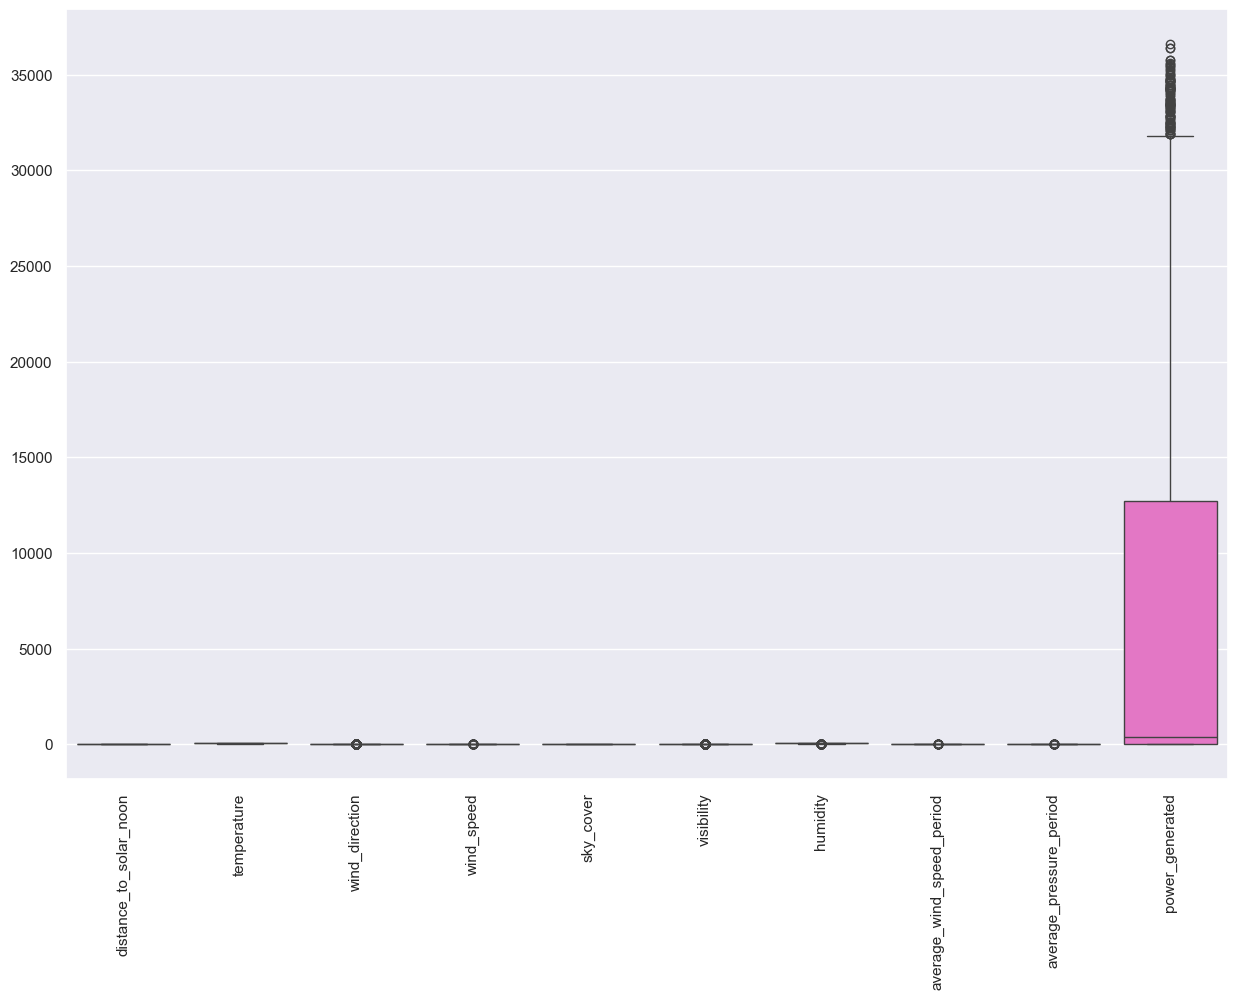

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

Removing outliers:

In [22]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [23]:
outlier_detection(df,columns=['wind_direction','wind_speed','humidity','average_wind_speed_period','average_pressure_period','power_generated'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'distance_to_solar_noon'),
  Text(1, 0, 'temperature'),
  Text(2, 0, 'wind_direction'),
  Text(3, 0, 'wind_speed'),
  Text(4, 0, 'sky_cover'),
  Text(5, 0, 'visibility'),
  Text(6, 0, 'humidity'),
  Text(7, 0, 'average_wind_speed_period'),
  Text(8, 0, 'average_pressure_period'),
  Text(9, 0, 'power_generated')])

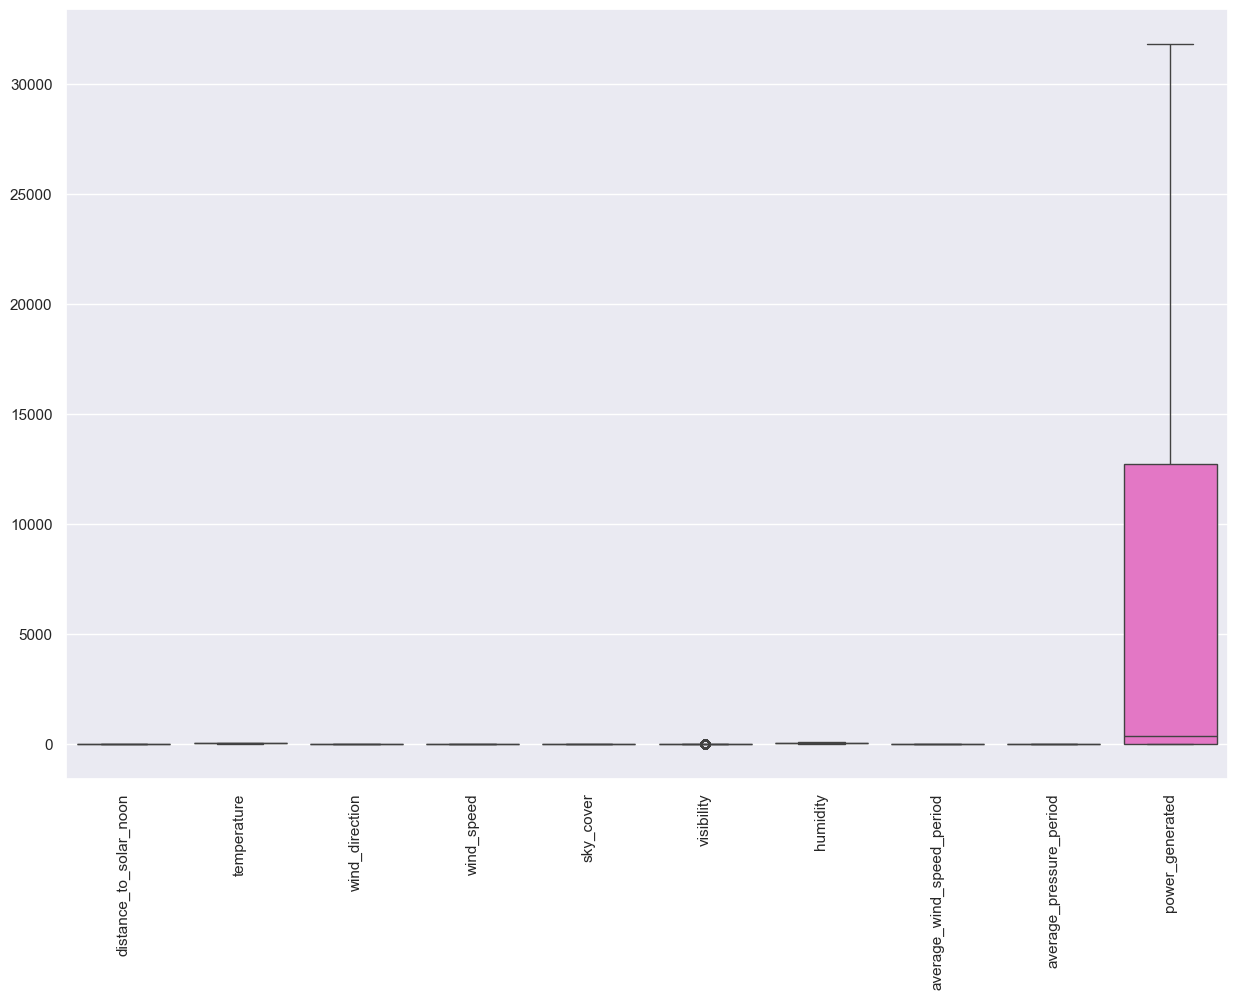

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

# Data Visualization:

array([[<Axes: title={'center': 'distance_to_solar_noon'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'wind_direction'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'sky_cover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'average_wind_speed_period'}>,
        <Axes: title={'center': 'average_pressure_period'}>],
       [<Axes: title={'center': 'power_generated'}>, <Axes: >, <Axes: >]],
      dtype=object)

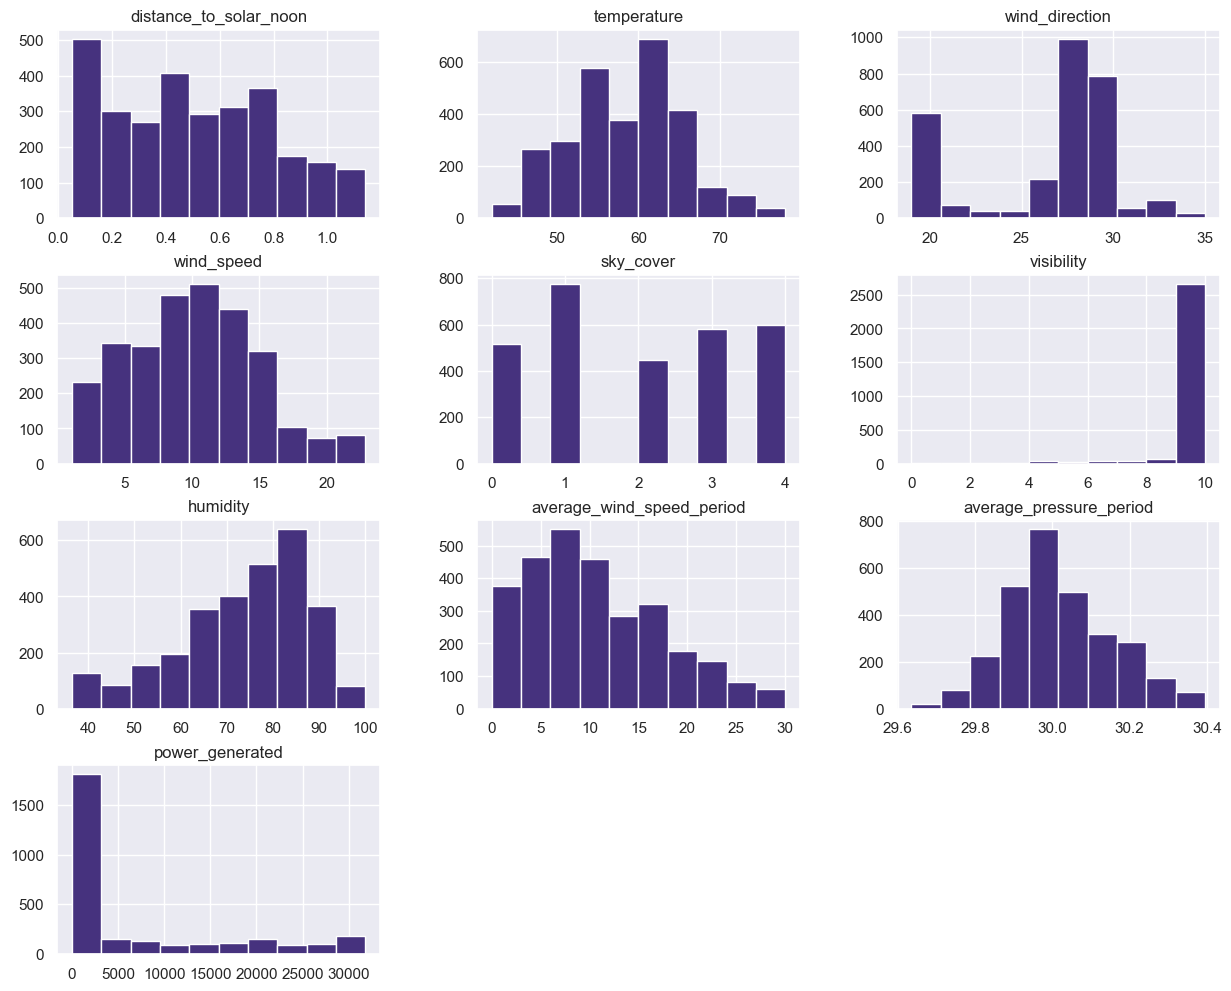

In [25]:
df.hist(figsize=(15, 12))

# boxplot

Text(0.5, 1.0, 'power_generated')

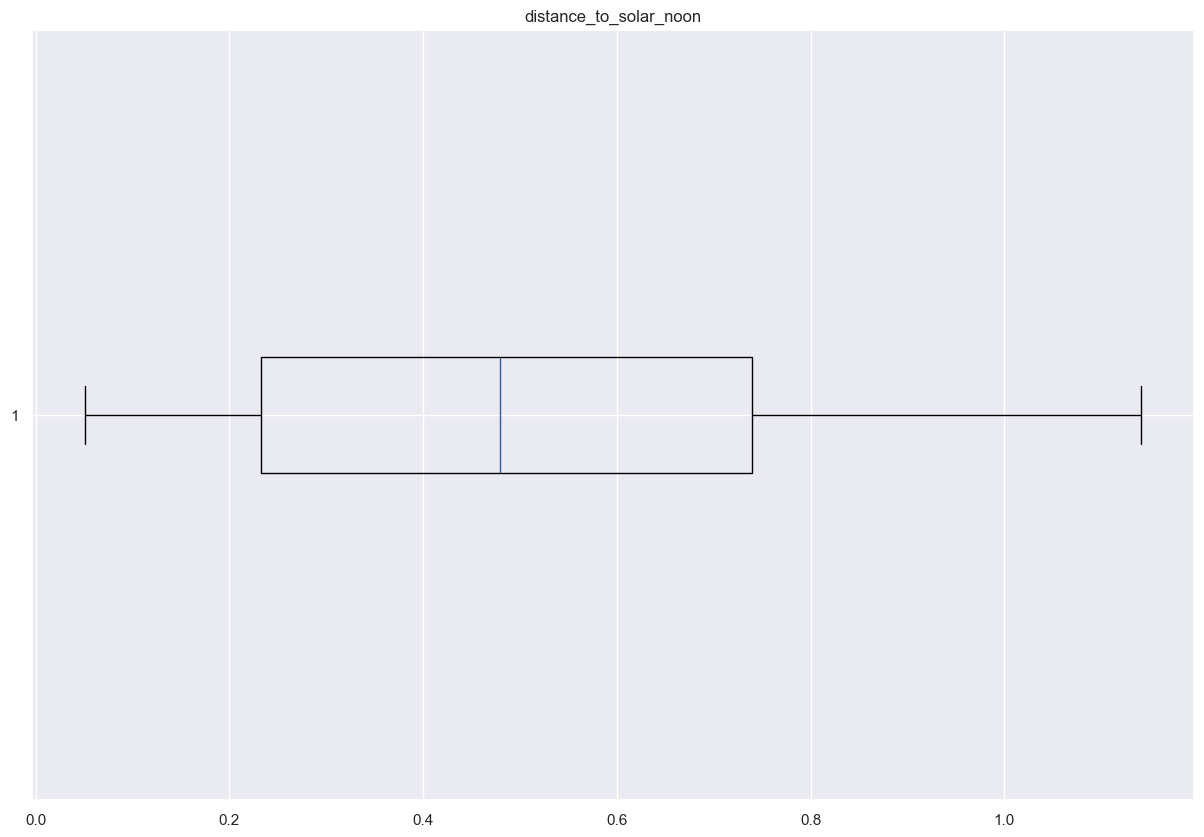

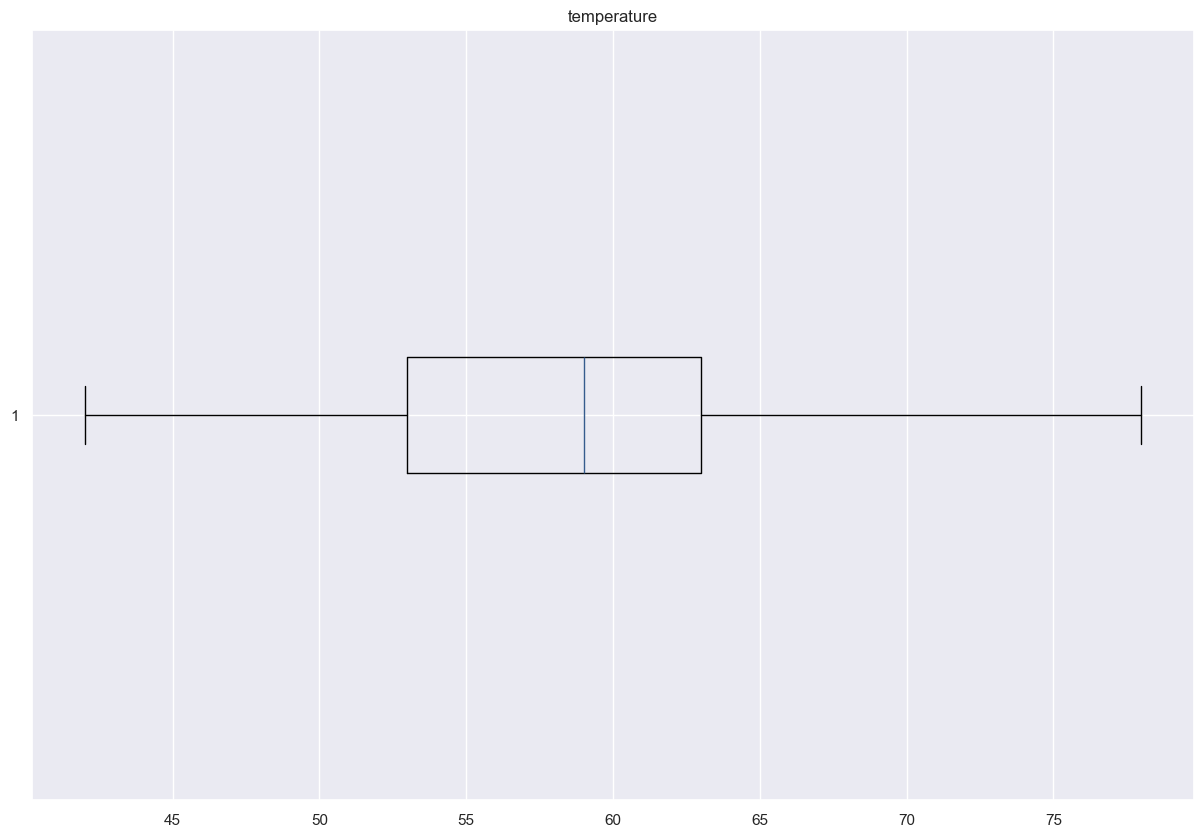

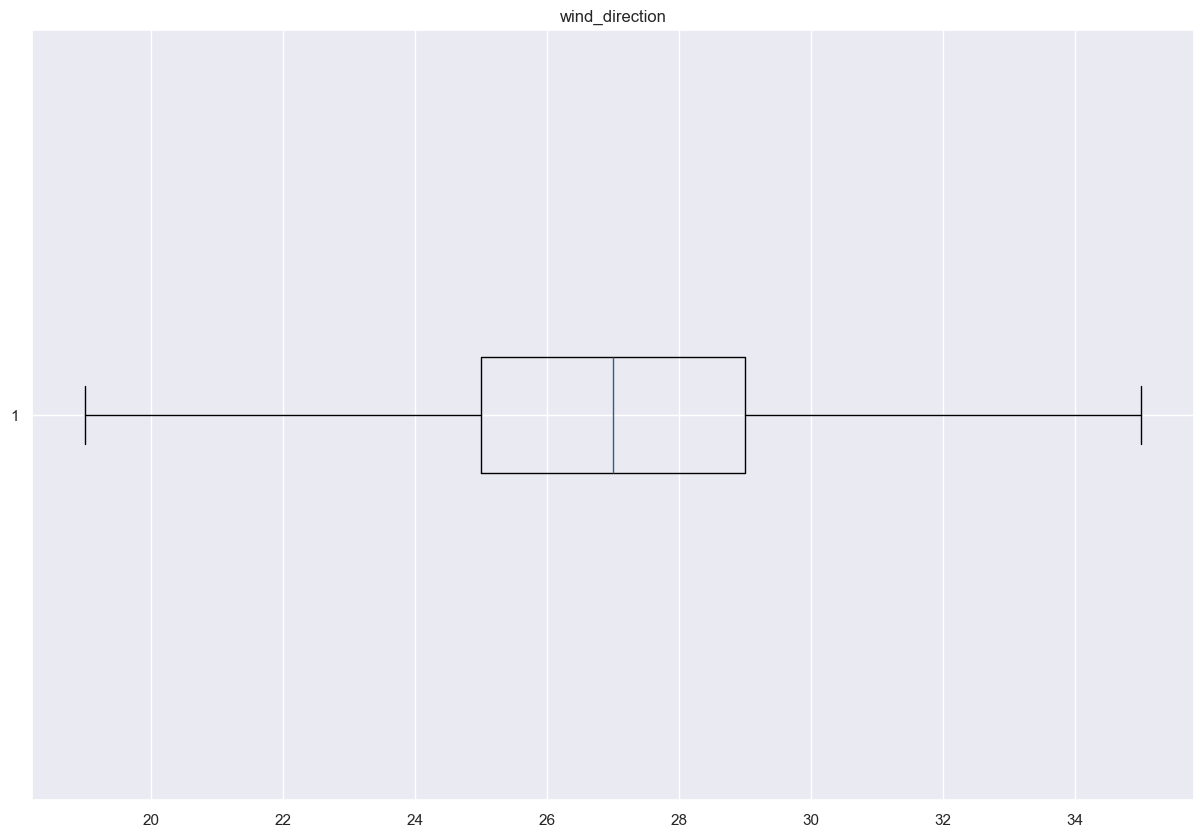

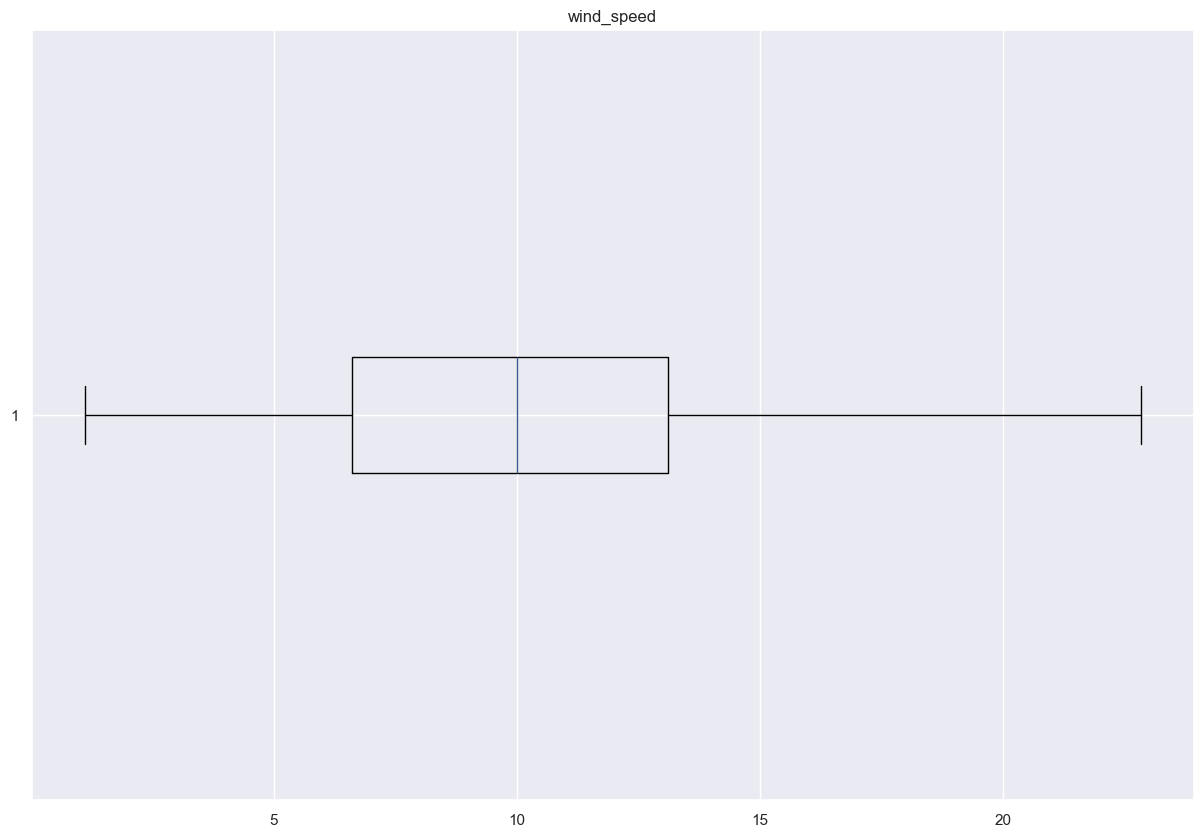

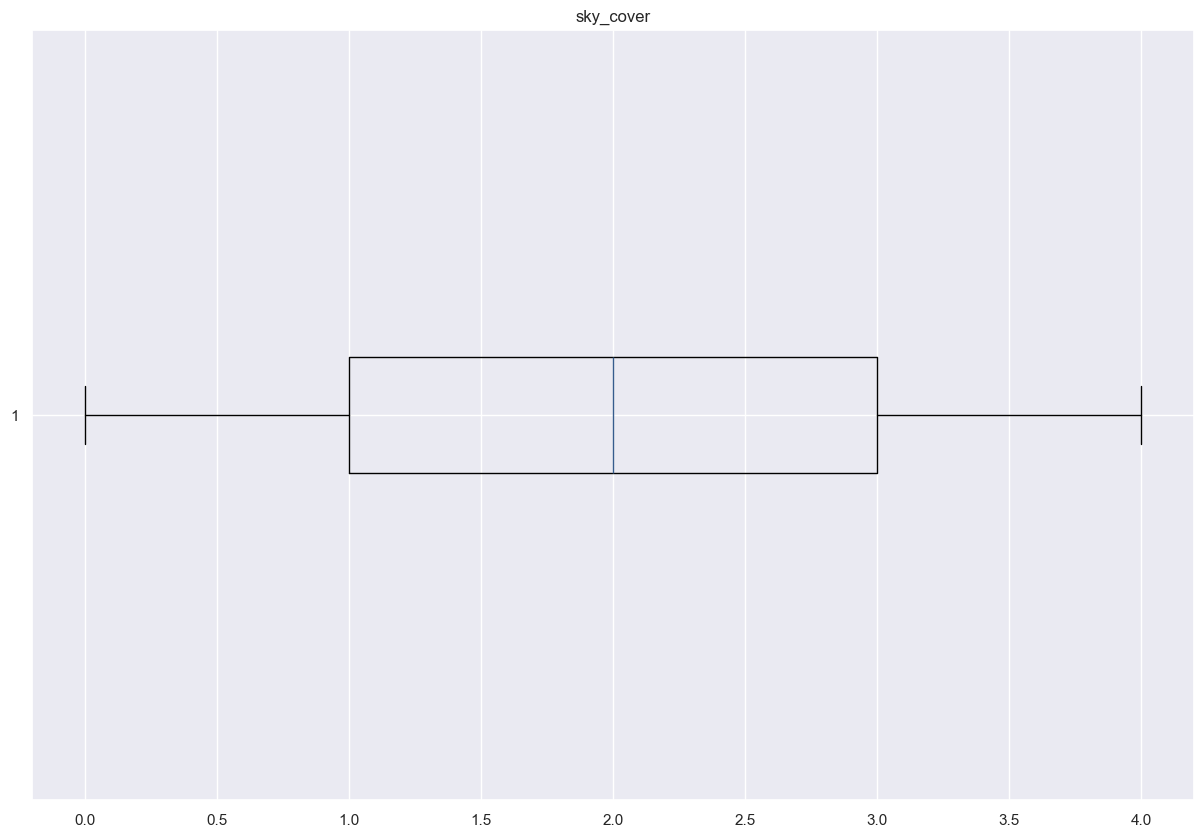

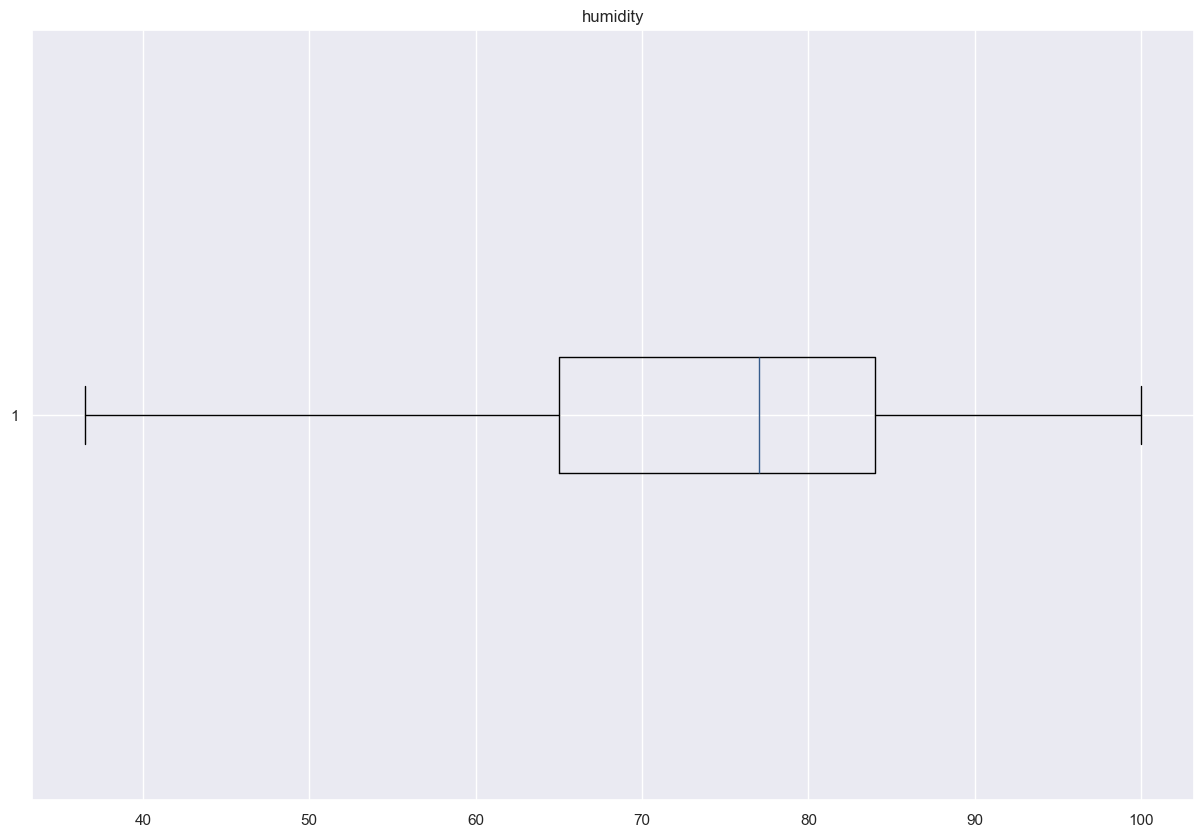

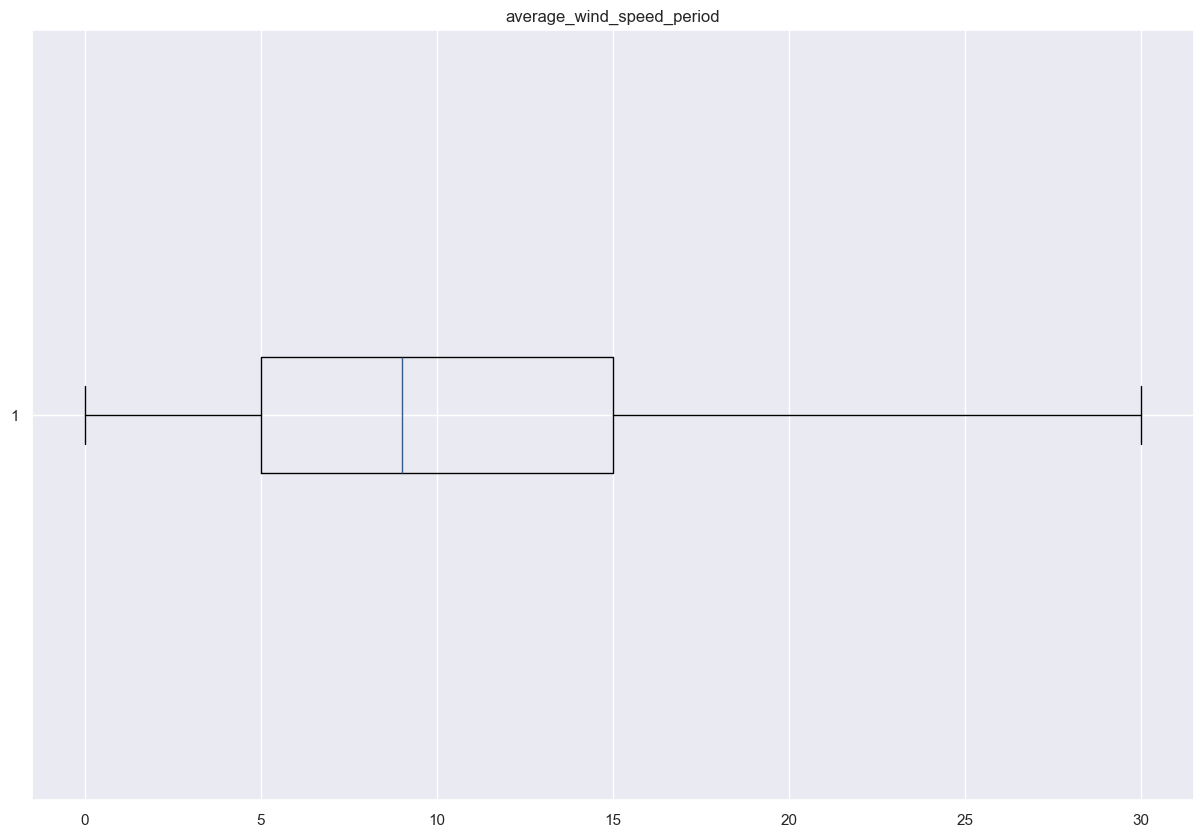

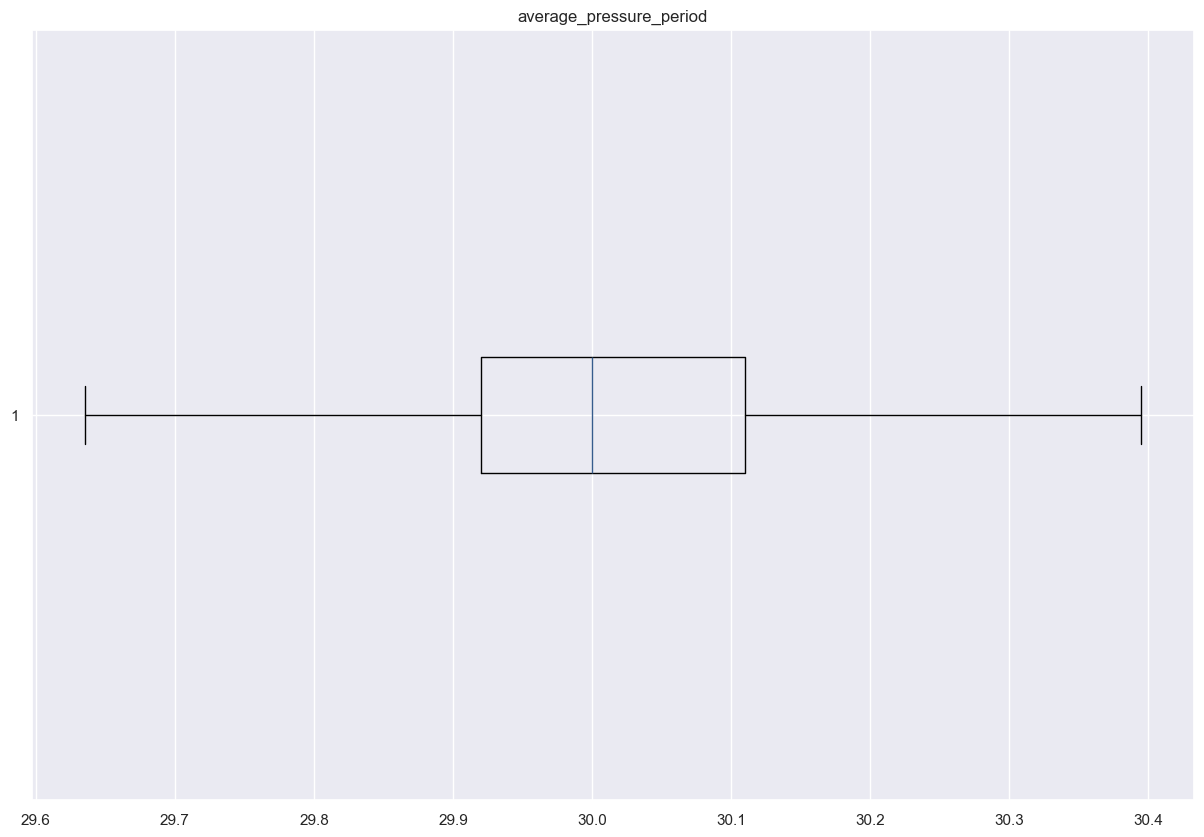

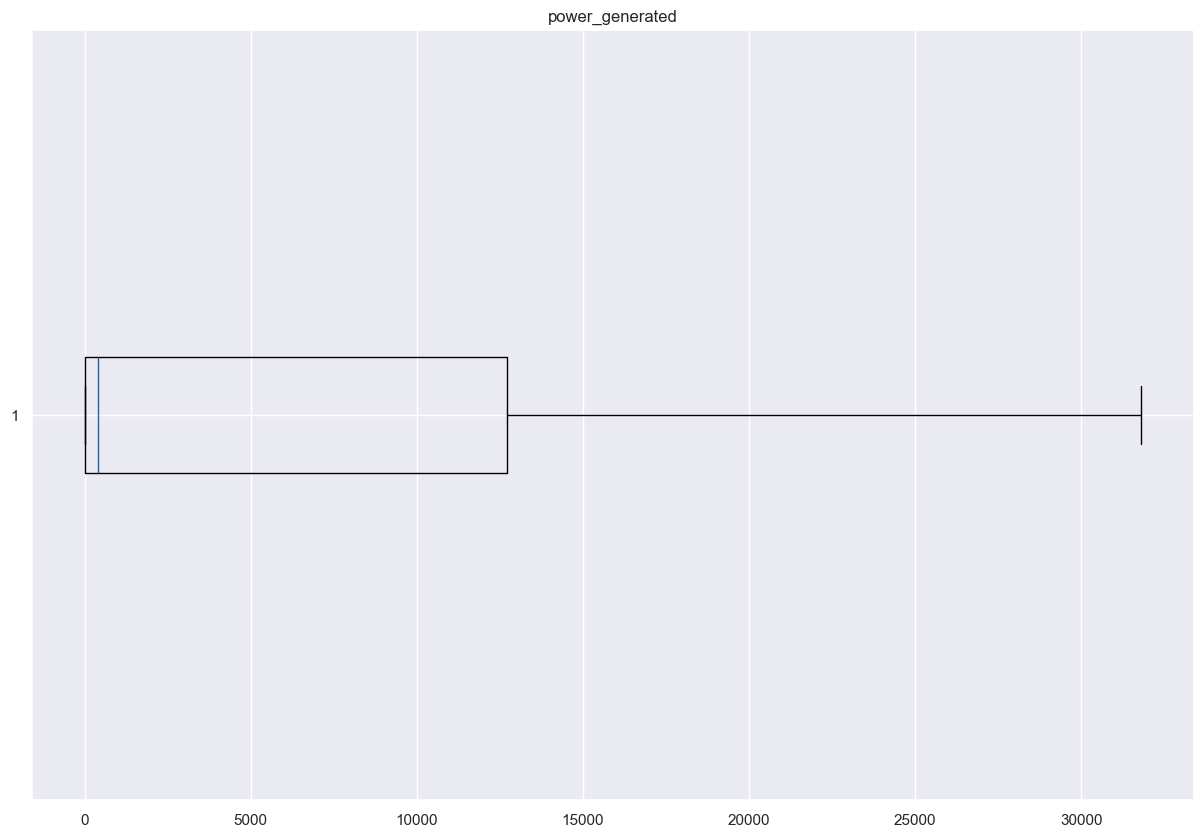

In [26]:
plt.figure(figsize=(15,10))
plt.boxplot(df['distance_to_solar_noon'],vert=False)
plt.title("distance_to_solar_noon")

plt.figure(figsize=(15,10))
plt.boxplot(df['temperature'],vert=False)
plt.title("temperature")

plt.figure(figsize=(15,10))
plt.boxplot(df['wind_direction'],vert=False)
plt.title("wind_direction")

plt.figure(figsize=(15,10))
plt.boxplot(df['wind_speed'],vert=False)
plt.title("wind_speed")

plt.figure(figsize=(15,10))
plt.boxplot(df['sky_cover'],vert=False)
plt.title("sky_cover")

plt.figure(figsize=(15,10))
plt.boxplot(df['humidity'],vert=False)
plt.title("humidity")

plt.figure(figsize=(15,10))
plt.boxplot(df['average_wind_speed_period'],vert=False)
plt.title("average_wind_speed_period")

plt.figure(figsize=(15,10))
plt.boxplot(df['average_pressure_period'],vert=False)
plt.title("average_pressure_period")

plt.figure(figsize=(15,10))
plt.boxplot(df['power_generated'],vert=False)
plt.title("power_generated")


Text(0, 0.5, 'power_generated')

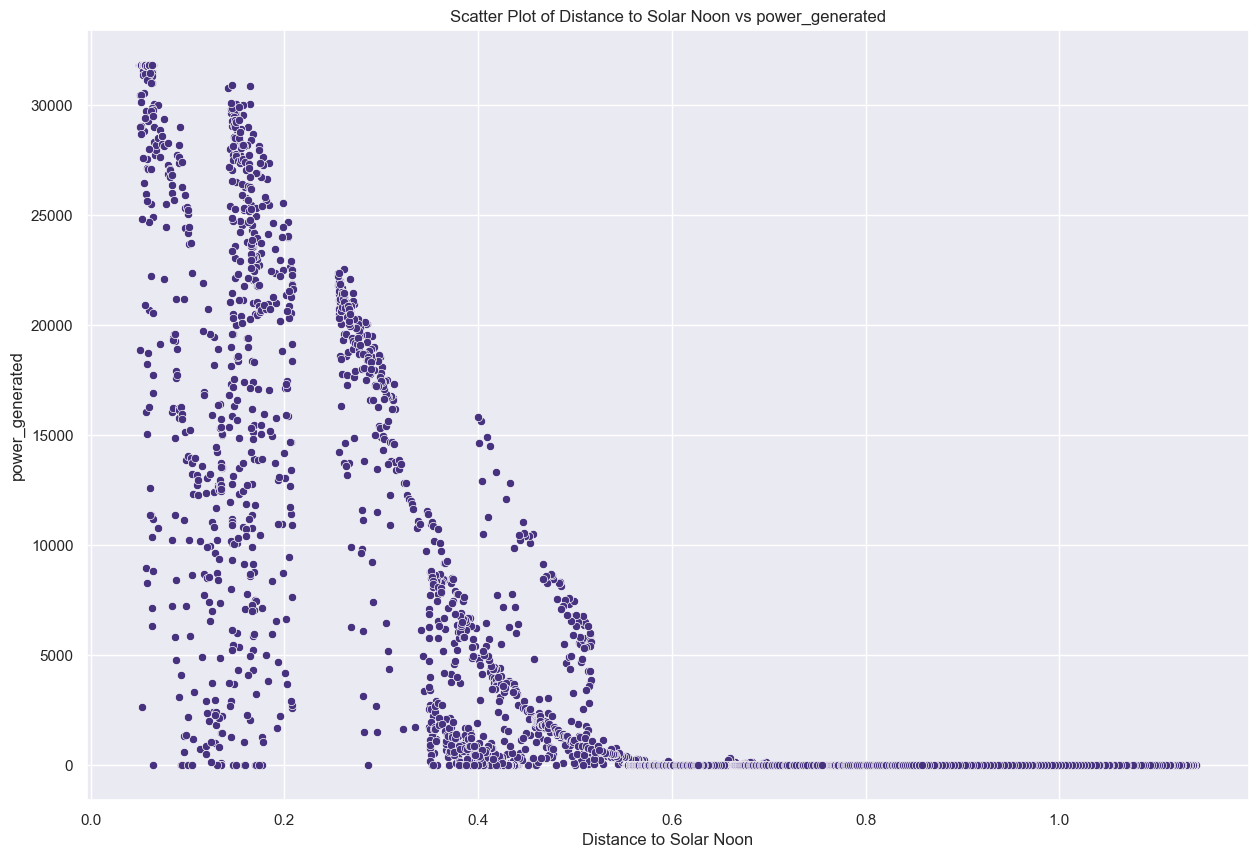

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='distance_to_solar_noon', y='power_generated', data=df)
plt.title('Scatter Plot of Distance to Solar Noon vs power_generated')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('power_generated')

Text(0, 0.5, 'power_generated')

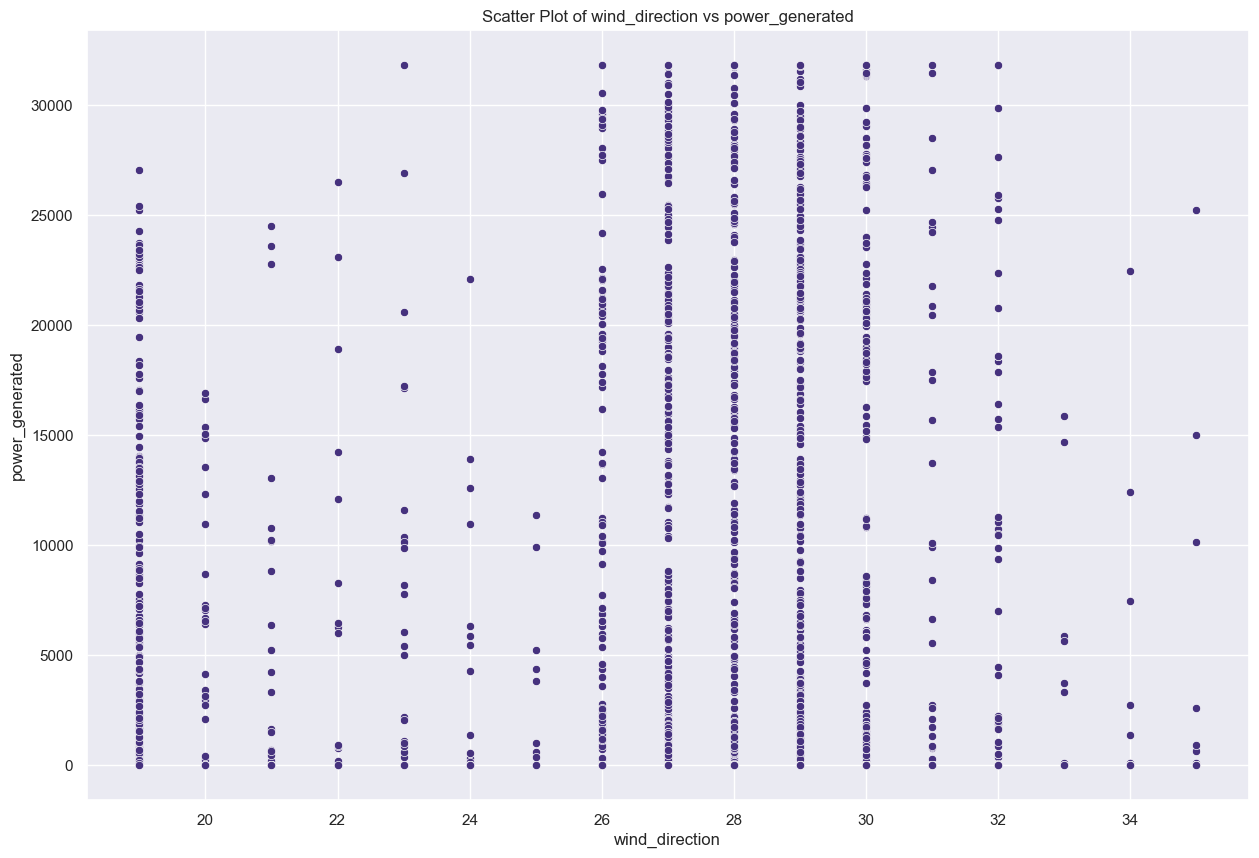

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='wind_direction', y='power_generated', data=df)
plt.title('Scatter Plot of wind_direction vs power_generated')
plt.xlabel('wind_direction')
plt.ylabel('power_generated')

Text(0, 0.5, 'power_generated')

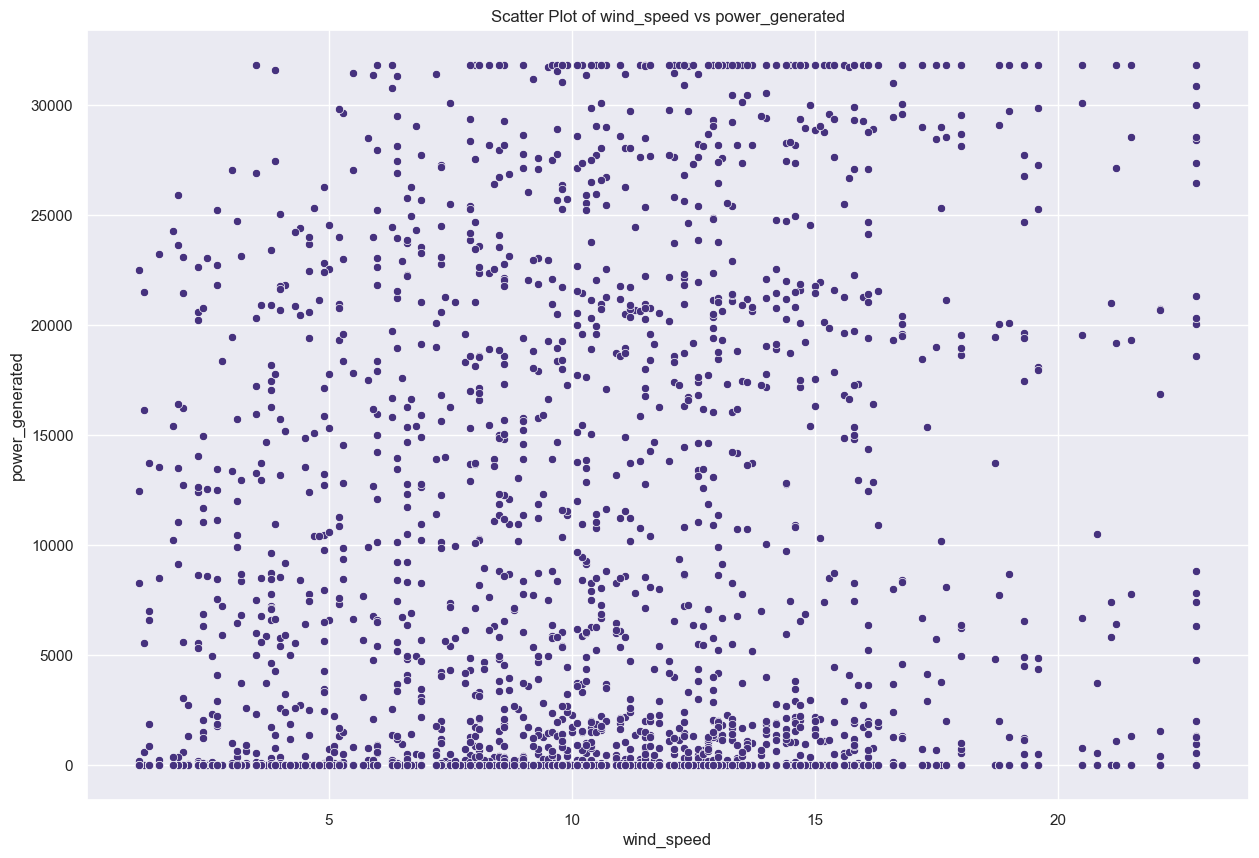

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='wind_speed', y='power_generated', data=df)
plt.title('Scatter Plot of wind_speed vs power_generated')
plt.xlabel('wind_speed')
plt.ylabel('power_generated')

Text(0, 0.5, 'average_pressure_period')

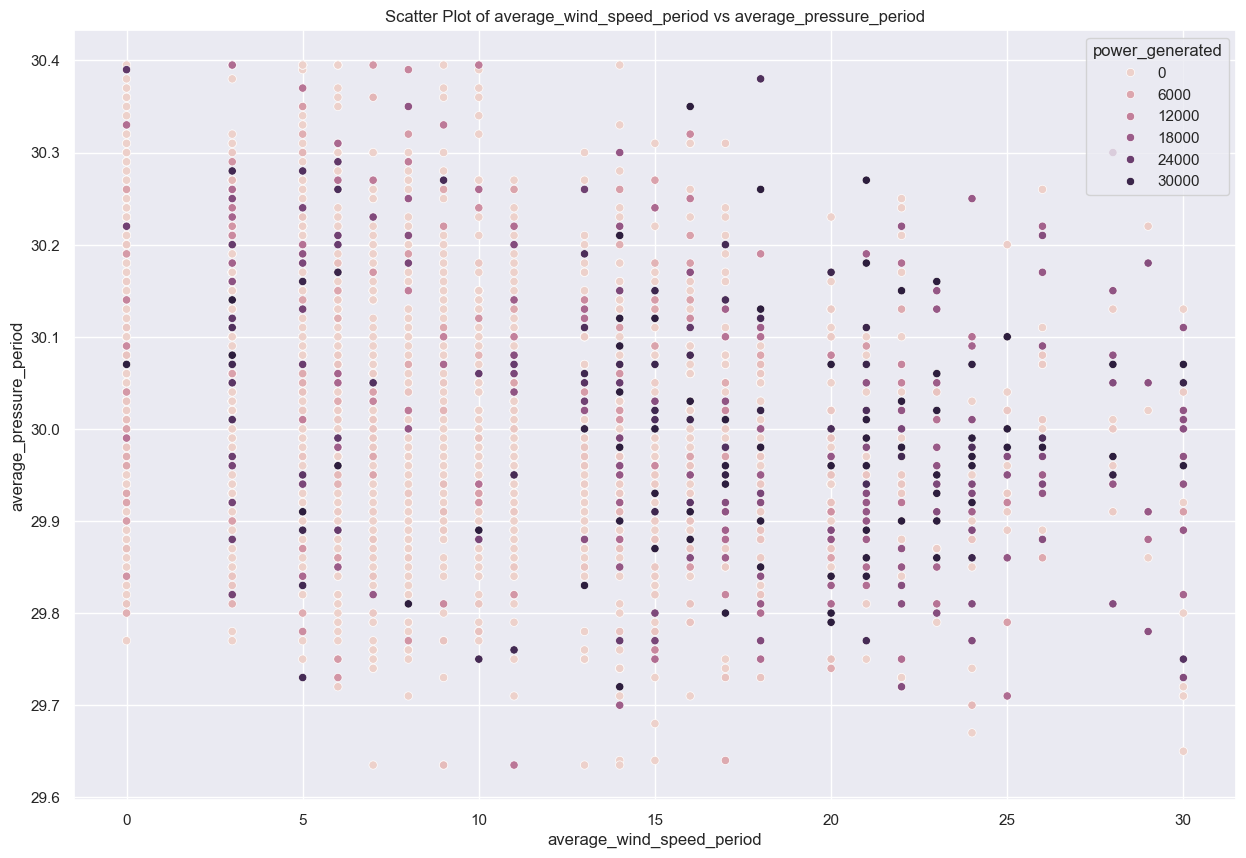

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='average_wind_speed_period', y='average_pressure_period', data=df,hue='power_generated')
plt.title('Scatter Plot of average_wind_speed_period vs average_pressure_period')
plt.xlabel('average_wind_speed_period')
plt.ylabel('average_pressure_period')

In [31]:
df.corr()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
distance_to_solar_noon,1.000000,-0.145235,-0.097256,-0.146580,-0.015183,0.065541,0.377035,-0.214650,0.083487,-0.749707
temperature,-0.145235,1.000000,0.333577,0.101729,-0.230673,0.194354,-0.212191,0.056532,-0.439066,0.133567
wind_direction,-0.097256,0.333577,1.000000,0.230455,-0.232934,0.149750,-0.115121,0.154899,-0.199716,0.150531
wind_speed,-0.146580,0.101729,0.230455,1.000000,0.109571,0.184360,-0.002451,0.672000,-0.384099,0.139370
sky_cover,-0.015183,-0.230673,-0.232934,0.109571,1.000000,-0.224131,0.396197,0.045516,-0.086125,-0.187146
visibility,0.065541,0.194354,0.149750,0.184360,-0.224131,1.000000,-0.298217,0.144059,-0.109466,0.075104
humidity,0.377035,-0.212191,-0.115121,-0.002451,0.396197,-0.298217,1.000000,-0.227000,0.021715,-0.536850
average_wind_speed_period,-0.214650,0.056532,0.154899,0.672000,0.045516,0.144059,-0.227000,1.000000,-0.295260,0.273695
average_pressure_period,0.083487,-0.439066,-0.199716,-0.384099,-0.086125,-0.109466,0.021715,-0.295260,1.000000,-0.036316
power_generated,-0.749707,0.133567,0.150531,0.139370,-0.187146,0.075104,-0.536850,0.273695,-0.036316,1.000000


correlation matrix with heatmap

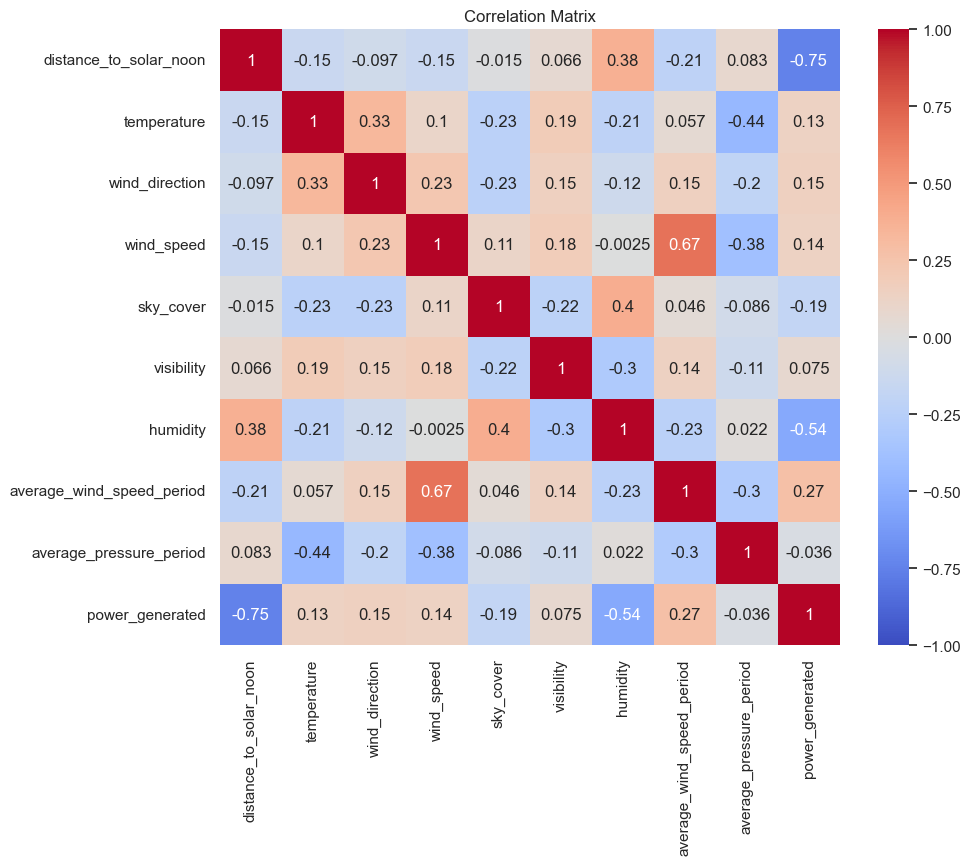

In [32]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Pairplot to explore relationships between all numerical variables

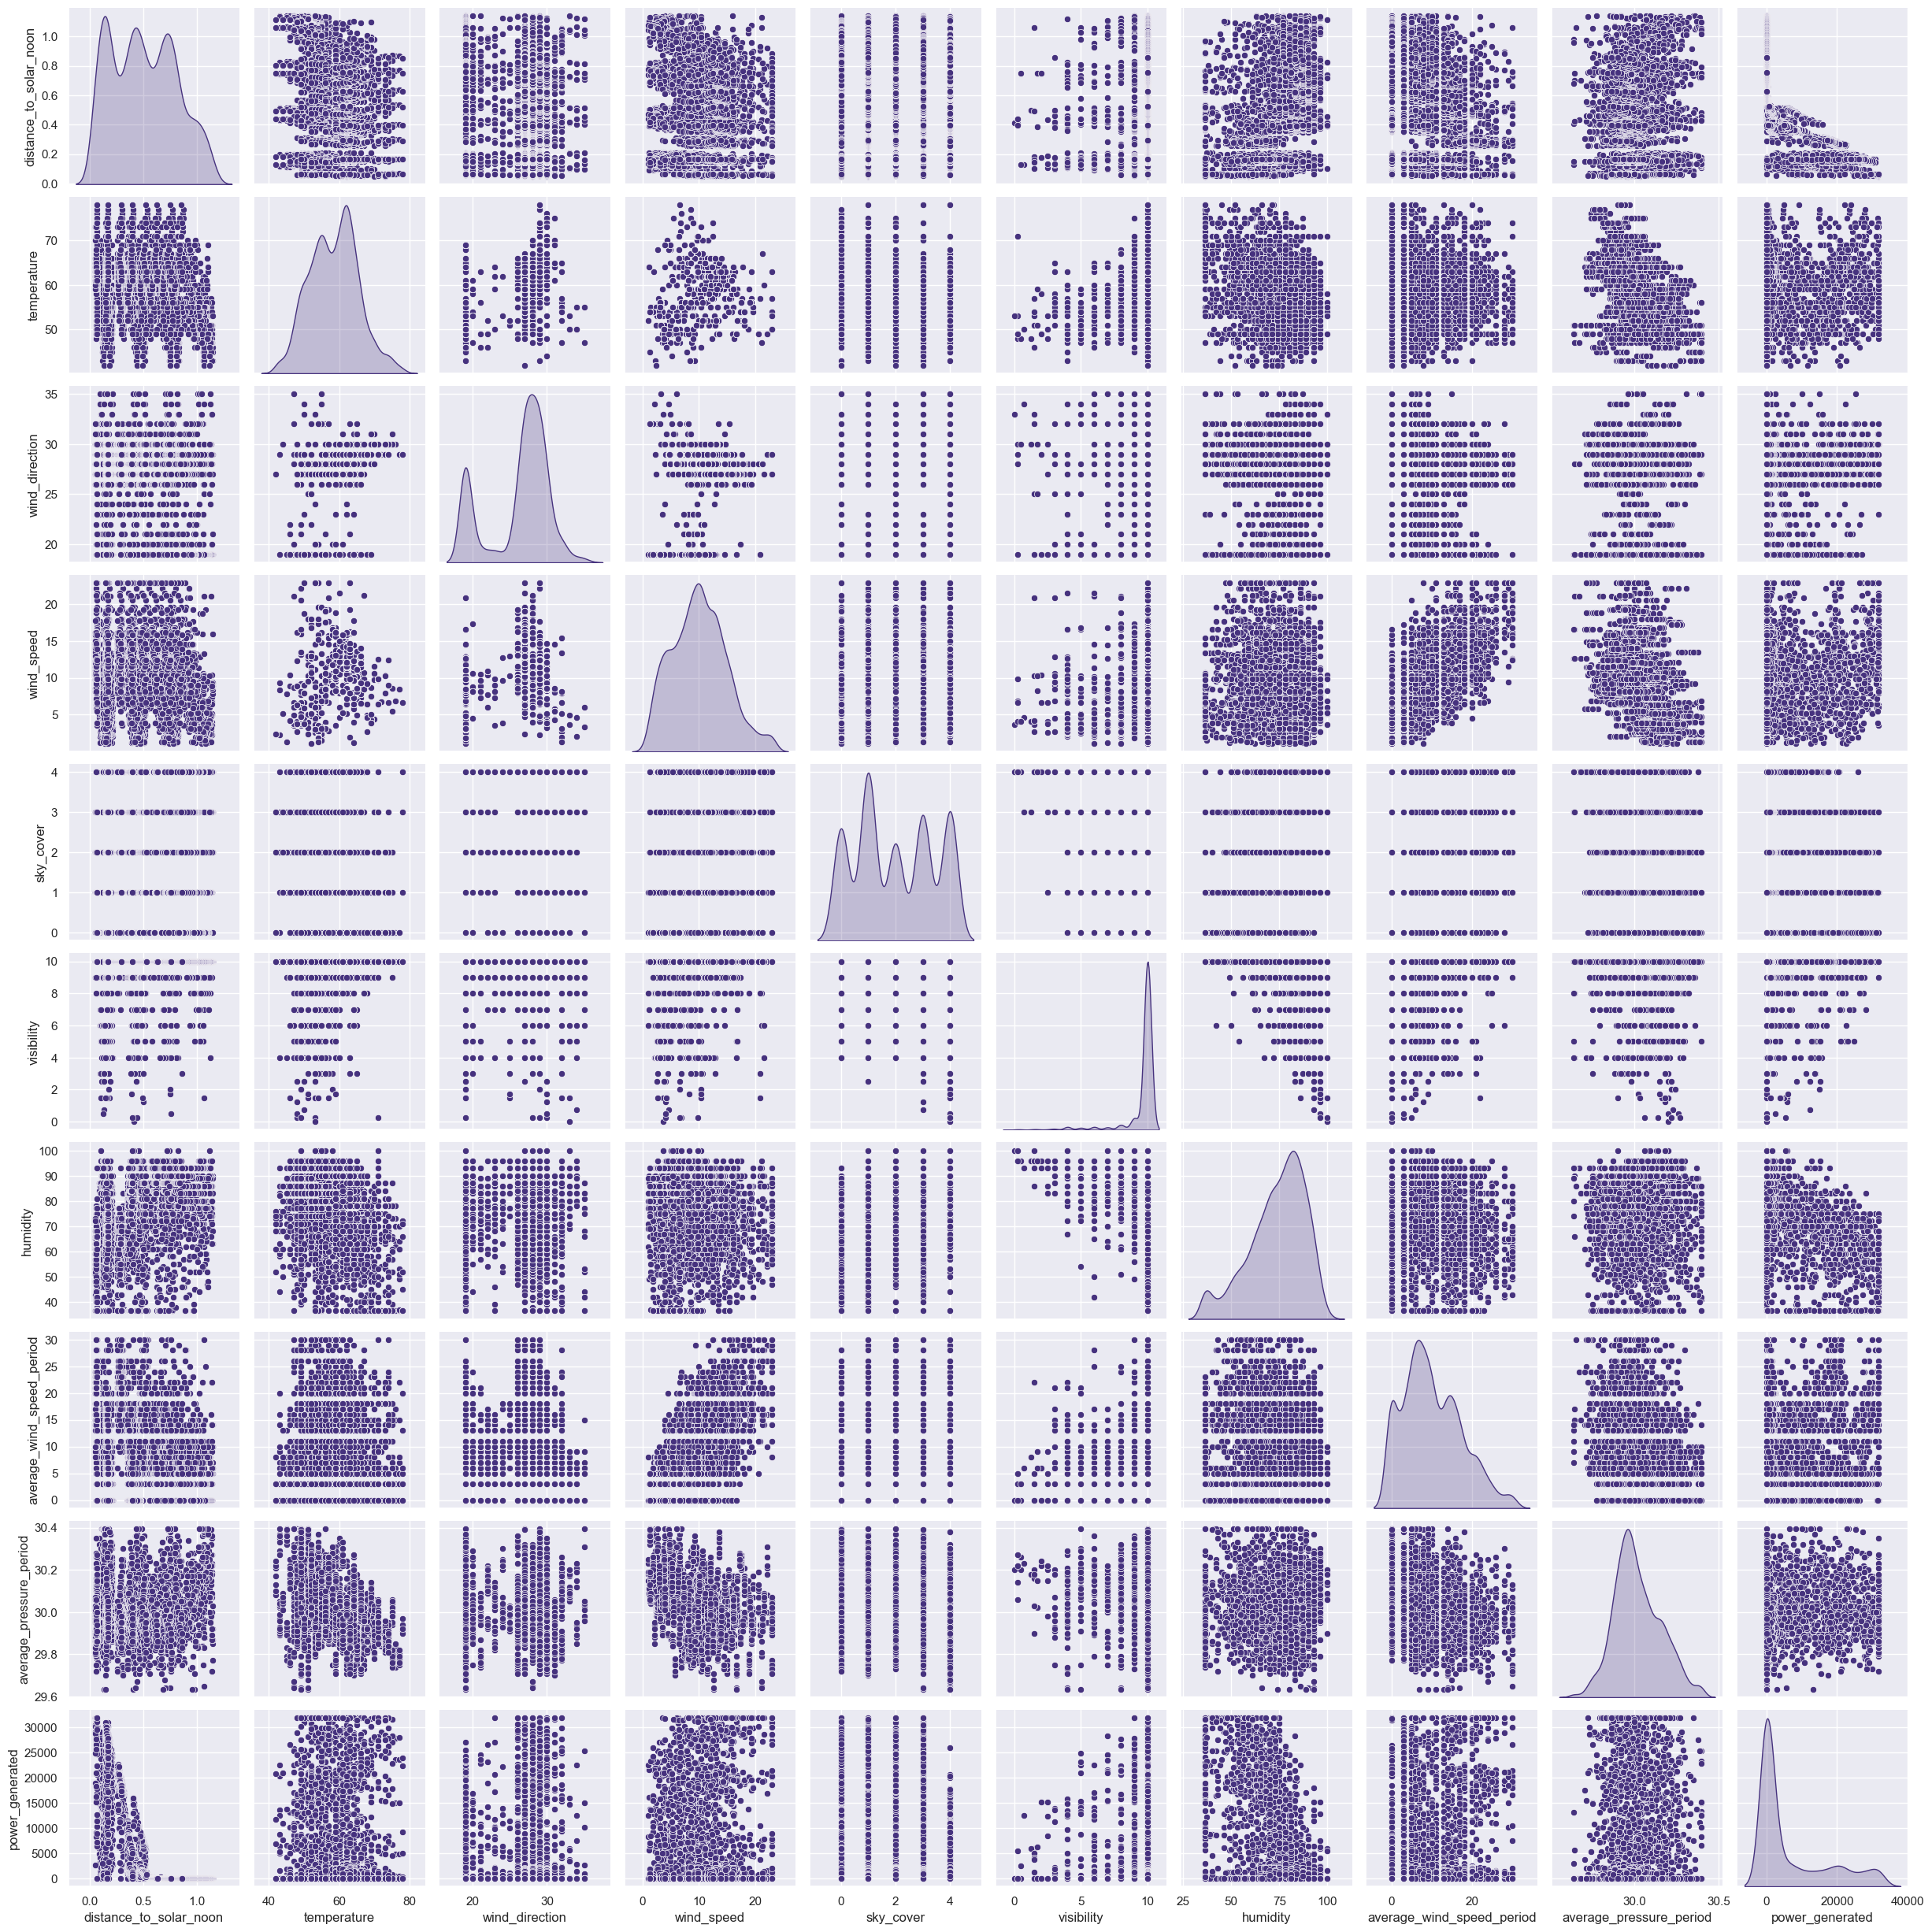

In [33]:
sns.pairplot(df, diag_kind='kde')
plt.show()

# Model Building

Model building is the process of developing a mathematical or computational model that can predict or explain a specific outcome based on input data.

In [34]:
# Data Preprocessing
x = df.drop('power_generated', axis=1)
y = df['power_generated']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                     feature       VIF
0     distance_to_solar_noon  1.320680
1                temperature  1.510534
2             wind_direction  1.233749
3                 wind_speed  2.185319
4                  sky_cover  1.395640
5                 visibility  1.246247
6                   humidity  1.721617
7  average_wind_speed_period  2.061320
8    average_pressure_period  1.508943


1. vif  = 1 ,No multicollinearity
Means,The independent variable is not correlated with the other variables, so it's a good predictor.

2. 1 < VIF < 5:Moderate multicollinearity.
Generally acceptable. The variable shows some correlation with other predictors, but it's not enough to cause concern. The model can still be used effectively.

3. VIF ≥ 5:High multicollinearity.
Indicates that the variable is highly correlated with other predictors in the model. This can cause problems with the interpretation of the coefficients. It may lead to inflated standard errors, making it harder to determine which variables are statistically significant.


after observing above vif values we can say that there is no multicollinearty
since The independent variable is not correlated with the other variables, so it's a good predictor.

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Define pipelines for each model

A pipeline in machine learning is a sequence of data preprocessing and modeling steps combined into a single workflow, ensuring consistency and efficiency. It simplifies tasks like training, cross-validation, and hyperparameter tuning by automating the application of these steps in a specific order.

# Linear regression

In [37]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [39]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 39086408.7583
R-squared: 0.6319


In [40]:
# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)


Coefficients: [-2.17139288e+04 -6.97242836e+01  1.04395010e+02  1.00295560e+01
 -8.05352948e+02  6.15162048e+01 -1.68456805e+02  1.26101825e+02
  2.33785185e+03]
Intercept: -38876.04898567285


# Lasso

In [41]:
# Initialize the Lasso model with an alpha value (regularization strength)
# You can adjust alpha to control the regularization. A higher alpha means more regularization.
model = Lasso(alpha=1.0)

# Fit the model on the training data
model.fit(x_train, y_train)

Lasso()

In [42]:
# Make predictions on the test set
y_pred = model.predict(x_test)


In [43]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 39090614.7701
R-squared: 0.6319


In [44]:
# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

Coefficients: [-2.16994490e+04 -7.02695360e+01  1.04365654e+02  9.54910958e+00
 -8.05356187e+02  6.03814435e+01 -1.68660264e+02  1.25955147e+02
  2.26330353e+03]
Intercept: -36580.787922676085


# HyperParameterTuning for Lasso

In [45]:
lasso_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}
lasso_grid = GridSearchCV(estimator=model, param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(x_train, y_train)
print(f"Best Lasso Parameters: {lasso_grid.best_params_}")


Best Lasso Parameters: {'alpha': 1, 'max_iter': 1000}


# Ridge

In [46]:
# Initialize the Ridge model with an alpha value (regularization strength)
# You can adjust alpha to control the regularization. A higher alpha means more regularization.
model = Ridge(alpha=1.0)

# Fit the model on the training data
model.fit(x_train, y_train)


Ridge()

In [47]:
# Make predictions on the test set
y_pred = model.predict(x_test)


In [48]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 39128932.7067
R-squared: 0.6315


In [49]:
# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)


Coefficients: [-2.15779942e+04 -6.96455493e+01  1.04755460e+02  1.05055288e+01
 -8.00887696e+02  5.51653207e+01 -1.69870727e+02  1.26173866e+02
  2.27620331e+03]
Intercept: -36957.55952234255


# HyperParameterTuning for Ridge

In [50]:
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}
ridge_grid = GridSearchCV(estimator=model, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(x_train, y_train)
print(f"Best Ridge Parameters: {ridge_grid.best_params_}")


Best Ridge Parameters: {'alpha': 1, 'max_iter': 1000}


# Random Forest

In [51]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
# Make predictions on the test set
rf_pred = rf_model.predict(x_test)


In [53]:
# Evaluate the Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Regressor - MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}")


Random Forest Regressor - MSE: 10596610.5778, R^2: 0.9002


# HyperParameterTuning for RandomForest

In [54]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf_grid = GridSearchCV(estimator=rf_model , param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(x_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# Decision tree

In [55]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [56]:
# Make predictions on the test set
dt_pred = dt_model.predict(x_test)


In [57]:
# Evaluate the Decision Tree Regressor
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree Regressor - MSE: {dt_mse:.4f}, R^2: {dt_r2:.4f}")


Decision Tree Regressor - MSE: 19445296.6841, R^2: 0.8169


# HyperParameterTuning for DecisionTree

In [58]:
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid.fit(x_train, y_train)
print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Gradient Boosting

In [59]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gb_model.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [60]:
# Make predictions on the test set
gb_pred = gb_model.predict(x_test)


In [61]:
# Evaluate the Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Regressor - MSE: {gb_mse:.4f}, R^2: {gb_r2:.4f}")


Gradient Boosting Regressor - MSE: 8534160.0440, R^2: 0.9196


# HyperParameterTuning for Gradient Boosting

In [62]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(x_train, y_train)
print(f"Best Gradient Boosting Parameters: {gb_grid.best_params_}")


Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


# Evaluate the Best Model

In [63]:
# Lasso Evaluation
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso Best Model - MSE: {lasso_mse:.4f}, R^2: {lasso_r2:.4f}")

# Ridge Evaluation
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Best Model - MSE: {ridge_mse:.4f}, R^2: {ridge_r2:.4f}")

# Random Forest Evaluation
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Best Model - MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}")

# Decision Tree Evaluation
dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree Best Model - MSE: {dt_mse:.4f}, R^2: {dt_r2:.4f}")

# Gradient Boosting Evaluation
gb_best = gb_grid.best_estimator_
gb_pred = gb_best.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Best Model - MSE: {gb_mse:.4f}, R^2: {gb_r2:.4f}")


Lasso Best Model - MSE: 39090614.7701, R^2: 0.6319
Ridge Best Model - MSE: 39128932.7067, R^2: 0.6315
Random Forest Best Model - MSE: 9614549.9515, R^2: 0.9095
Decision Tree Best Model - MSE: 13469273.1684, R^2: 0.8732
Gradient Boosting Best Model - MSE: 9212007.6846, R^2: 0.9133


In [64]:
# Initialize models
models = {
    'linear':LinearRegression(),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fit models and store predictions
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Mean Squared Error': mse,
        'R-squared': r2
    })

In [65]:
result = pd.DataFrame(results)
result

,Model,Mean Squared Error,R-squared
0,linear,3.908641e+07,0.631936
1,Lasso,3.909061e+07,0.631896
2,Ridge,3.912893e+07,0.631535
3,Random Forest,1.059661e+07,0.900215
4,Decision Tree,1.944530e+07,0.816890
5,Gradient Boosting,8.534160e+06,0.919637


# So,here we go with Gradient Boosting for model building we go with GradientBoostingRegressor

In [108]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: Scaling
    ('regressor', GradientBoostingRegressor(random_state=42))  # Gradient Boosting Regressor
])


In [116]:
pip = pipeline.fit(x_train,y_train)
pip

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [120]:
ypred = pip.predict(x_test)
ypred = np.maximum(ypred, 0)  # Set all negative predictions to 0
ypred

array([2.18059086e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.24746256e+04, 2.64224170e+04, 2.18598487e+02, 0.00000000e+00,
       5.26206117e+03, 2.73293562e+03, 1.25873757e+04, 0.00000000e+00,
       1.96013587e+04, 4.05754342e+02, 4.66595263e+02, 0.00000000e+00,
       0.00000000e+00, 1.33933007e+04, 3.76394074e+03, 9.68161191e+01,
       1.96707040e+04, 0.00000000e+00, 5.59283739e+01, 1.20670400e+04,
       1.61987805e+04, 5.82542111e+03, 4.28542204e+03, 0.00000000e+00,
       3.87011437e+03, 4.65125899e+03, 4.09791518e+03, 3.14127323e+04,
       3.15628098e+04, 1.93169796e+03, 0.00000000e+00, 8.91787947e+03,
       0.00000000e+00, 2.67075978e+04, 1.82984969e+04, 1.04859832e+02,
       1.77878476e+03, 1.66977568e+04, 1.52345983e+04, 0.00000000e+00,
       1.95146468e+03, 3.06230443e+04, 8.36105944e+01, 2.34971140e+04,
       1.95375450e+04, 9.22042432e+01, 0.00000000e+00, 2.04387210e+04,
       1.98363010e+04, 0.00000000e+00, 1.40203814e+03, 2.82996550e+03,
      

In [77]:
import pickle

pickle.dump(model, open('solarr.pkl','wb'))